In [2]:
import json

In [3]:
import requests

In [4]:
from io import BytesIO

In [5]:
from PIL import Image

In [6]:
cams_json_file_loc = "./cams.json"
log_file_loc = "./pics.log"
pic_folder = "./pics/"

In [7]:
from datetime import datetime as dt

In [21]:
def get_pic(cams_json_file_loc, log_file_loc, pic_folder):
    # get all cams
    with open(cams_json_file_loc, "r") as f:
        cams = json.load(f)
        
    cam_ids = [cam["cam_id"] for cam in cams]
    
    # read the log to see which cam was last pulled
    curr_cam_id = cam_ids[0]
    with open(log_file_loc, "r") as f:
        lines = f.readlines()
        if len(lines) > 0:
            last_line = lines[-1]
            last_cam_id = int(last_line.split("\t")[0].split(" ")[1])
            last_cam_id_ind = [i for i, cam_id in enumerate(cam_ids) if cam_id == last_cam_id][0]
            curr_cam_id_ind = last_cam_id_ind + 1 if last_cam_id_ind + 1 < len(cam_ids) else 0
            curr_cam_id = cam_ids[curr_cam_id_ind]
    
    print(last_cam_id_ind, curr_cam_id_ind, curr_cam_id)
    curr_cam = [cam for cam in cams if cam["cam_id"] == curr_cam_id][0]
    print(curr_cam)
    
    # get the image
    pull_dt = dt.now().strftime("%m%d%y_%H%M%S")
    img_addr = curr_cam["img_addr"]
    raw_img = requests.get(img_addr).content
    img = Image.open(BytesIO(raw_img))
    
    # save the image
    img_filename = "cam_id_{}_{}.png".format(curr_cam_id, pull_dt)
    img.save("{}{}".format(pic_folder, img_filename))
    
    # update the log
    with open(log_file_loc, "a") as f:
        f.write("cam_id: {} pulled: {} to: {}{}\n".format(curr_cam_id, pull_dt, pic_folder, img_filename))

In [22]:
get_pic(cams_json_file_loc = cams_json_file_loc, log_file_loc = log_file_loc, pic_folder = pic_folder)

23 24 25
{'location': '2 Ave @ 72 St', 'borough': 'Manhattan', 'multiview_id': '539', 'img_addr': 'http://207.251.86.238/cctv480.jpg', 'cam_id': 25}


OSError: broken data stream when reading image file

Check cam 25

In [23]:
# get all cams
with open(cams_json_file_loc, "r") as f:
    cams = json.load(f)

In [24]:
cams[24]

{'location': '2 Ave @ 72 St',
 'borough': 'Manhattan',
 'multiview_id': '539',
 'img_addr': 'http://207.251.86.238/cctv480.jpg',
 'cam_id': 25}

In [26]:
img_addr = cams[24]["img_addr"]

In [38]:
raw_img = requests.get(img_addr).content
img = Image.open(BytesIO(raw_img))

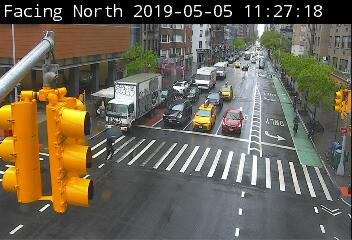

In [40]:
img